In [1]:
import time
import numpy as np
import xgboost as xgb
from xgboost import plot_importance,plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 基于XGBoost原生接口的分类问题

In [2]:
# 加载样本数据集
iris = load_iris()
X,y = iris.data,iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565) # 数据集分割

In [3]:
# 训练算法参数设置
params = {
    # 通用参数
    'booster': 'gbtree', # 使用的弱学习器,有两种选择gbtree（默认）和gblinear,gbtree是基于
                        # 树模型的提升计算，gblinear是基于线性模型的提升计算
    'nthread': 4, # XGBoost运行时的线程数，缺省时是当前系统获得的最大线程数
    'silent':0, # 0：表示打印运行时信息，1：表示以缄默方式运行，默认为0
    'num_feature':4, # boosting过程中使用的特征维数
    'seed': 1000, # 随机数种子
    # 任务参数
    'objective': 'multi:softmax', # 多分类的softmax,objective用来定义学习任务及相应的损失函数
    'num_class': 3, # 类别总数
    # 提升参数
    'gamma': 0.1, # 叶子节点进行划分时需要损失函数减少的最小值
    'max_depth': 6, # 树的最大深度，缺省值为6，可设置其他值
    'lambda': 2, # 正则化权重
    'subsample': 0.7, # 训练模型的样本占总样本的比例，用于防止过拟合
    'colsample_bytree': 0.7, # 建立树时对特征进行采样的比例
    'min_child_weight': 3, # 叶子节点继续划分的最小的样本权重和
    'eta': 0.1, # 加法模型中使用的收缩步长   
    
}
# plst = params.items()

In [4]:
# 数据集格式转换
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

In [5]:
# 迭代次数，对于分类问题，每个类别的迭代次数，所以总的基学习器的个数 = 迭代次数*类别个数
num_rounds = 50
model = xgb.train(params, dtrain, num_rounds) # xgboost模型训练

[19:52:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [6]:
# 对测试集进行预测
y_pred = model.predict(dtest)

In [7]:
# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))

accuarcy: 96.67%


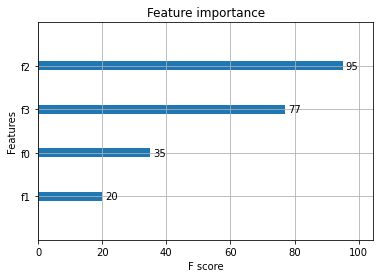

In [8]:
# 显示重要特征
plot_importance(model)
plt.show()

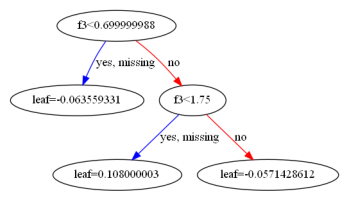

In [13]:
# 可视化树的生成情况，num_trees是树的索引
plot_tree(model, num_trees=1) 

In [14]:
# 将基学习器输出到txt文件中
model.dump_model("model1.txt")

# 基于XGBoost原生接口的回归问题 

In [15]:
# 加载数据集
boston = load_boston()
# 获取特征值和目标指
X,y = boston.data,boston.target
# 获取特征名称
feature_name = boston.feature_names

In [16]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# 参数设置
params = {
        'booster': 'gbtree',
        'objective': 'reg:gamma', # 回归的损失函数，gmma回归
        'gamma': 0.1,
        'max_depth': 5,
        'lambda': 3,
        'subsample': 0.7,
        'colsample_bytree': 0.7,
        'min_child_weight': 3,
        'silent': 1,
        'eta': 0.1,
        'seed': 1000,
        'nthread': 4,
    }
# plst = params.items()

In [18]:
# 数据集格式转换
dtrain = xgb.DMatrix(X_train, y_train,feature_names = feature_name)
dtest = xgb.DMatrix(X_test,feature_names = feature_name)

In [19]:
# 模型训练
num_rounds = 30
model = xgb.train(params, dtrain, num_rounds)

[20:00:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [20]:
# 模型预测
y_pred = model.predict(dtest)

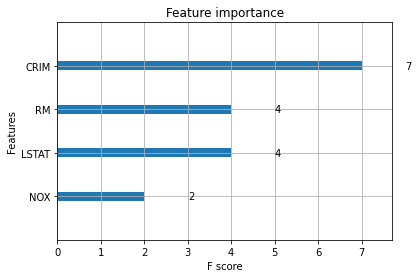

In [21]:
# 显示重要特征
plot_importance(model,importance_type ="weight")
plt.show()

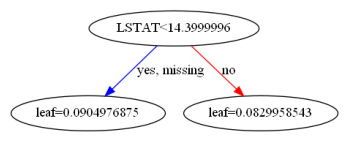

In [23]:
# 可视化树的生成情况，num_trees是树的索引
plot_tree(model, num_trees=17) 

In [24]:
# 将基学习器输出到txt文件中
model.dump_model("model2.txt")

# 基于sklearn的接口实现分类

In [25]:
# 加载样本数据集
iris = load_iris()
X,y = iris.data,iris.target
# 获取特征名称
feature_name = iris.feature_names

In [26]:
# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) 

In [28]:
# 模型训练
model = xgb.XGBClassifier(max_depth=5, n_estimators=50, silent=True, objective='multi:softmax',feature_names=feature_name)
model.fit(X_train, y_train)

[20:07:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { feature_names, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              feature_names=['sepal length (cm)', 'sepal width (cm)',
                             'petal length (cm)', 'petal width (cm)'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [29]:
# 预测
y_pred = model.predict(X_test)

In [30]:
# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))

accuarcy: 100.00%


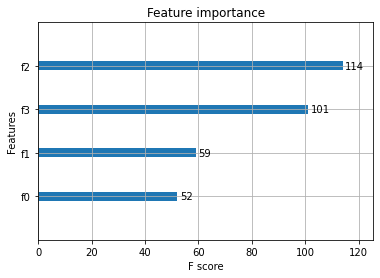

In [31]:
# 显示重要特征
plot_importance(model)

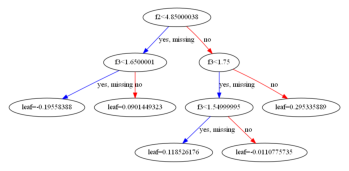

In [32]:
# 可视化树的生成情况，num_trees是树的索引
plot_tree(model, num_trees=5)

# 基于sklearn的接口的回归问题

In [33]:
# 获取数据
boston = load_boston()
X,y = boston.data,boston.target

In [34]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# 模型训练
model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=50, silent=True, objective='reg:gamma')
model.fit(X_train, y_train)

[20:08:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=0, num_parallel_tree=1,
             objective='reg:gamma', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=None, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
# 预测
y_pred = model.predict(X_test)

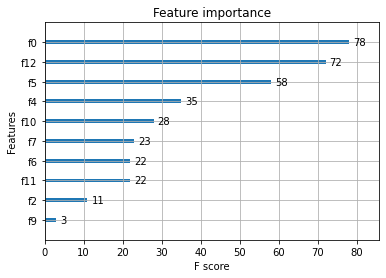

In [37]:
# 显示重要特征
plot_importance(model)
plt.show()

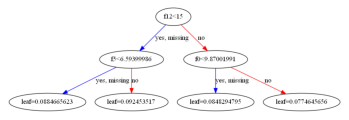

In [38]:
# 可视化树的生成情况，num_trees是树的索引
plot_tree(model, num_trees=17) 